## Name:Beili Li 
## Decision Trees 
### Agenda
1. Introduction to Decision Trees
2. The Decision Tree Algorithms
3. Decision Tree for Classification
4. Decision Tree for Regression


### 1. Introduction to Decision Trees

* Non-parametric supervised learning method for regression & classification
* It's similar to playing 'dumb charades'.
* A good algorithm will have less & right questions compared to not-so-good one
* The nodes are questions & leafs are prediction

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
play_data = pd.read_csv('tennis.csv.txt')

In [3]:
play_data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


* A decision tree for above data

<img src="https://github.com/awantik/machine-learning-slides/blob/master/dt4.PNG?raw=true" width="600px">

### 2. Decision Tree Algorithm

* in this part we use decision tree split criterionn to decide the attribute to split the tree
* all attriburs are :outlook,temperature,humidity,windy. Here the output is the probability of yes and no. 
* the criterion we use to split is entropy which is the objective function of CART. 

#### Criterion of creating Decision Tree
* Entropy - Objective of CART is to maximize information gain in each split
* Gini Impurity - If classes are mixed, gini impurity is maximul
##### Both the approaches, yields almost same results. We will discuss algorithm using Entropy

### Entropy
* 

<img src="https://www.saedsayad.com/images/Entropy.png">

### Entropy of play
* Entropy(play) = – p(Yes) . log2p(Yes) – p(No) . log2p(No)
* frist we calculate the probability of yes and no in column **play** of original dataset 
* the entropy is 0.94
* the split criterion is to maximize the information gain after split based on attribute.
 - the formula is Gain(S, A) = Entropy(S) – ∑ [ p(S|A) . Entropy(S|A) ]




In [4]:
play_data.play.value_counts()

yes    9
no     5
Name: play, dtype: int64

In [5]:
Entropy_Play = -(9/14)*np.log2(9/14) -(5/14)*np.log2(5/14)

In [6]:
Entropy_Play

0.9402859586706311

### Information Gain
* We want to choose the attribute, splitting by which information gain will be the most
* Next step is calculating information gain for all attributes

#### Information Gain on splitting by Outlook
* Gain(Play, Outlook) = Entropy(Play) – ∑ [ p(Play|Outlook) . Entropy(Play|Outlook) ]
* Gain(Play, Outlook) = Entropy(Play) – [ p(Play|Outlook=Sunny) . Entropy(Play|Outlook=Sunny) ] – [ p(Play|Outlook=Overcast) . Entropy(Play|Outlook=Overcast) ]  – [ p(Play|Outlook=Rain) . Entropy(Play|Outlook=Rain) ] 

In [7]:
play_data[play_data.outlook == 'sunny']

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


* from the above dataset we have p(yes|Sunny)=2/5, p(no|Sunny)=3/5
* Entropy(Play|Outlook=Sunny)=0.971

In [5]:
Entropy_Play_Outlook_Sunny =-(3/5)*np.log2(3/5) -(2/5)*np.log2(2/5)
Entropy_Play_Outlook_Sunny

0.9709505944546686

In [10]:
play_data[play_data.outlook == 'overcast']

,outlook,temp,humidity,windy,play
2,overcast,hot,high,False,yes
6,overcast,cool,normal,True,yes
11,overcast,mild,high,True,yes
12,overcast,hot,normal,False,yes


* Entropy(Play|Outlook=overcast)=0
* Since, it's a homogenous data entropy will be 0

In [12]:
play_data[play_data.outlook == 'rainy']

,outlook,temp,humidity,windy,play
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
9,rainy,mild,normal,False,yes
13,rainy,mild,high,True,no


* Entropy(Play|Outlook=rainy)=0.971

In [4]:
Entropy_Play_Outlook_Rain = -(2/5)*np.log2(2/5) - (3/5)*np.log2(3/5)
Entropy_Play_Outlook_Rain

0.9709505944546686

#### Gain on splitting by attribute outlook

* Gain(Play, Outlook) = Entropy(Play) – [ p(Play|Outlook=Sunny) . Entropy(Play|Outlook=Sunny) ] – 
[ p(Play|Outlook=Overcast) . Entropy(Play|Outlook=Overcast) ] – [ p(Play|Outlook=Rain) . Entropy(Play|Outlook=Rain) ]
* Gain(Play, Outlook)=0.247

In [15]:
Entropy_Play - (5/14)*Entropy_Play_Outlook_Sunny - (4/14)*0 - (5/14) * Entropy_Play_Outlook_Rain 

0.24674981977443933

#### Other gains
* Gain(Play, Temperature) - 0.029
* Gain(Play, Humidity) - 0.151
* Gain(Play, Wind) - 0.048

#### Conclusion - Outlook is winner & thus becomes root of the tree
<img src="https://i1.wp.com/sefiks.com/wp-content/uploads/2017/11/tree-v1.png?zoom=1.25&resize=728%2C252&ssl=1" width="600px">

### Time to find the next splitting criteria based on frist split is outlook

In [16]:
play_data[play_data.outlook == 'overcast']

,outlook,temp,humidity,windy,play
2,overcast,hot,high,False,yes
6,overcast,cool,normal,True,yes
11,overcast,mild,high,True,yes
12,overcast,hot,normal,False,yes


* Since, it's a homogenous data entropy of overcast will be 0
##### Conclusion - If outlook is overcast, play is true

### Let's find the next splitting feature

In [17]:
play_data[play_data.outlook == 'sunny']

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


In [18]:
# Entropy(Play_Sunny|)
Entropy_Play_Outlook_Sunny =-(3/5)*np.log2(3/5) -(2/5)*np.log2(2/5)

In [19]:
Entropy_Play_Outlook_Sunny

0.9709505944546686

### Information Gain for humidity
* Entropy for attribute high = 0, also entropy for attribute normal = 0 
* Gain(play|sunny,Humidity)=0.971

In [6]:
Entropy_Play_Outlook_Sunny - (3/5)*0 - (2/5)*0

0.9709505944546686

### Information Gain for windy
* False -> 3 -> [1+ 2-]
* True -> 2 -> [1+ 1-]
* p(play|False)=1/3,p(no|False)=2/3
* Entropy(wind|False)=0.9183
* Entripy(wind|True)=1
* Gain(play|sunny,Wind)=0.0199


In [21]:
Entropy_Wind_False = -(1/3)*np.log2(1/3) - (2/3)*np.log2(2/3)

In [22]:
Entropy_Wind_False

0.9182958340544896

In [23]:
Entropy_Play_Outlook_Sunny - (3/5)* Entropy_Wind_False  - (2/5)*1 

0.01997309402197489

### Information Gain for temperature
* hot -> 2 -> [2- 0+]
* mild -> 2 -> [1+ 1-]
* cool -> 1  -> [1+ 0-]
* Entropy(temp|hot)=0
* Entropy(temp|mild)=1
* Entropy(temp|cool)=0

In [24]:
Entropy_Play_Outlook_Sunny - (2/5)*0 - (1/5)*0 - (2/5)* 1

0.5709505944546686

* Gain(play|sunny,temp)=0.570 
* Gain(play|sunny,Wind)=0.0199
* Gain(play|sunny,Humidity)=0.971
* Humidity is the biggest 

#### Conclusion : Humidity is the best choice on sunny branch

<img src="https://github.com/awantik/machine-learning-slides/blob/master/dt3.PNG?raw=true" width="600px">

In [25]:
play_data[(play_data.outlook == 'sunny') & (play_data.humidity == 'high')]

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no


In [26]:
play_data[(play_data.outlook == 'sunny') & (play_data.humidity == 'normal')]

,outlook,temp,humidity,windy,play
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


### Splitting the rainy branch
* use the same calculation steps in the former code we can finish spliting of rainy branch 

In [27]:
play_data[play_data.outlook == 'rainy']

,outlook,temp,humidity,windy,play
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
9,rainy,mild,normal,False,yes
13,rainy,mild,high,True,no


In [28]:
# Entropy(Play_Rainy|)
Entropy_Play_Outlook_Rainy =-(3/5)*np.log2(3/5) -(2/5)*np.log2(2/5)

In [29]:
Entropy_Play_Outlook_Rainy

0.9709505944546686

### Information Gain for temp
* mild -> 3 [2+ 1-]
* cool -> 2 [1+ 1-]

In [30]:
Entropy_Play_Outlook_Rainy - (3/5)*0.918 - (2/5)*1

0.020150594454668602

### Information Gain for Windy

In [31]:
Entropy_Play_Outlook_Rainy - (2/5)*0 - (3/5)*0

0.9709505944546686

### Information Gain for Humidity
* High -> 2 -> [1+ 1-]
* Normal -> 3 -> [2+ 1-]

In [32]:
Entropy_Play_Outlook_Rainy_Normal = -(1/3)*np.log2(1/3) - (2/3)*np.log2(2/3)

In [33]:
Entropy_Play_Outlook_Rainy_Normal

0.9182958340544896

In [34]:
Entropy_Play_Outlook_Rainy - (2/5)*1 - (3/5)*Entropy_Play_Outlook_Rainy_Normal

0.01997309402197489

### Final Tree

<img src="https://github.com/awantik/machine-learning-slides/blob/master/dt4.PNG?raw=true" width="600px">

### 3. Decision Tree for Classification
* In this part we use algorithm to class the dataset of iris 
* The leaf nodes of decision tree means the number of class
* CART will convert features with continues values into categorical values
* Different tree will be generated with same data given in different order

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz, ExtraTreeClassifier

In [2]:
iris = load_iris()

* we show the first 5 rows of data(x) 

In [3]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

* show the frist 5 rows of data(y) 

In [4]:
iris.target[:5]

array([0, 0, 0, 0, 0])

* we use entropy as the spliting criterion 
* we split the data into training and testing to run the decision tree algorithm 

In [5]:
dt = DecisionTreeClassifier(criterion='entropy')

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
trainX,testX,trainY,testY = train_test_split(iris.data, iris.target)

In [8]:
dt.fit(trainX,trainY)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### results 
* We export the graph of the detial of decision tree for our dataset 
* In the tree graph the right arrow means true and left arrow means false 
* From the tree graph we can see that all the dataset will be classificed into 3 class based on entropy value in each node.

In [19]:
export_graphviz(dt,'dt.tree')

### Visualizing the tree
* http://www.webgraphviz.com/

* Criteria - Entropy
<img src="https://github.com/awantik/machine-learning-slides/blob/master/dt6.PNG?raw=true">

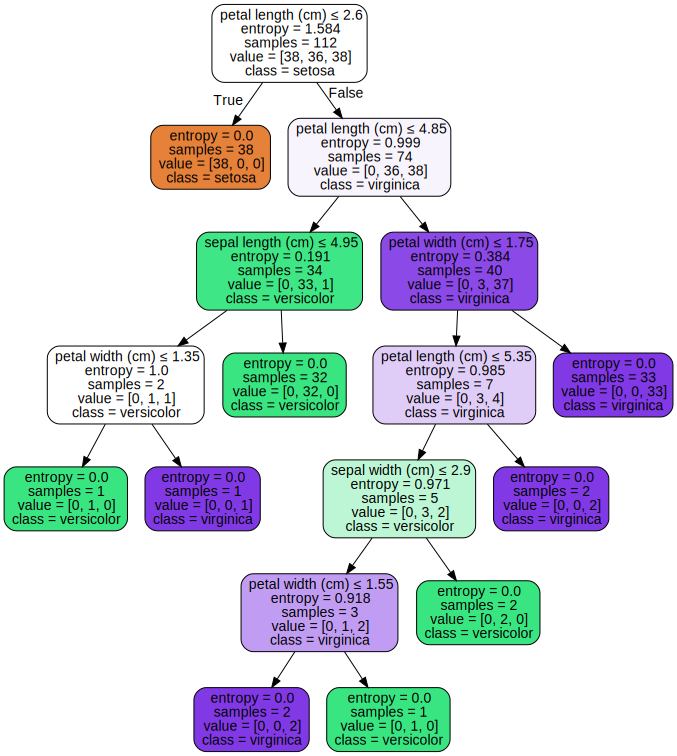

In [10]:
import graphviz
dot_data =export_graphviz(dt, out_file=None, 
                     feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

* we use the molde to predict our test set 

In [44]:
dt.predict(testX)

array([0, 1, 1, 1, 1, 2, 0, 0, 1, 1, 0, 2, 0, 2, 0, 1, 0, 2, 1, 2, 0, 1,
       2, 1, 2, 0, 2, 1, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1])

#### Feature Importances
* The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance
* Important features will be higher up the tree
* We can use this techniques to identify important features
* the most importance feature is x[3]

In [45]:
dt.feature_importances_

array([0.01552023, 0.        , 0.65923514, 0.32524463])

#### Visualizing Decision Decision Boundry
* We generate 4 class samples to visualize the decision boundry 

In [31]:
from sklearn.datasets import make_blobs

In [32]:
X,Y = make_blobs(n_features=2, n_samples=1000, cluster_std=.8, centers=4, random_state=6)

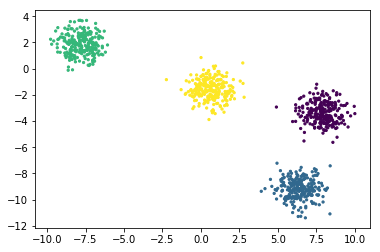

In [33]:
plt.scatter(X[:,0],X[:,1],c=Y,s=5, cmap='viridis')

In [34]:
dt = DecisionTreeClassifier()

* we fit the decision tree modle based on the defualt "gini" spliting criterion 

In [35]:
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

* Set min and max values and give it some padding
* Generate a grid of points with distance plot_step=0.2 between them


In [36]:
plot_step = 0.2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

* predict the label of the whole grid 

In [37]:
outcome = dt.predict(np.c_[xx.ravel(), yy.ravel()])

In [53]:
xx.shape

(86, 109)

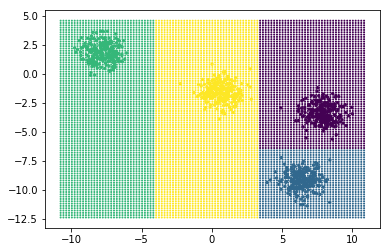

In [54]:
plt.scatter(X[:,0],X[:,1],c=Y,s=5,cmap='viridis')
plt.scatter(xx.ravel(),yy.ravel(),c=outcome,s=1,alpha=1, cmap='viridis')
plt.show()

### 4. Decision Tree for Regression
* Continues target is predicted with Tree.
* ID3 is modified for regression by replacing Information Gain with Mean Squared Error.
* Decision Tree tries to partition data into subsets of homogenous contents ( minimize mean squared error )

* we load the data and fit the decision tree regression model to predict the time 

In [13]:
play_time = pd.read_csv('tennis-time.csv.txt')

In [14]:
play_time

,outlook,temp,humidity,windy,time
0,sunny,hot,high,False,26
1,sunny,hot,high,True,30
2,overcast,hot,high,False,48
3,rainy,mild,high,False,46
4,rainy,cool,normal,False,62
5,rainy,cool,normal,True,23
6,overcast,cool,normal,True,43
7,sunny,mild,high,False,36
8,sunny,cool,normal,False,38
9,rainy,mild,normal,False,48


* Encode categorical x variables with value between 0 and n_classes-1
* Fit the regression model with x=['outlook','temp','humidity','windy'] y=['tiem']

In [15]:
from sklearn.preprocessing import LabelEncoder
for col in ['outlook','temp','humidity','windy']:
    le = LabelEncoder()
    play_time[col] = le.fit_transform(play_time[col])

In [16]:
from sklearn.tree import DecisionTreeRegressor

In [17]:
dt = DecisionTreeRegressor()

In [18]:
dt.fit(play_time.drop('time',axis=1), play_time.time)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [19]:
export_graphviz(dt,'regtree.dot',feature_names=['outlook','temp','humidity','windy'])

* data after encode transformation 

In [62]:
play_time

,outlook,temp,humidity,windy,time
0,2,1,0,0,26
1,2,1,0,1,30
2,0,1,0,0,48
3,1,2,0,0,46
4,1,0,1,0,62
5,1,0,1,1,23
6,0,0,1,1,43
7,2,2,0,0,36
8,2,0,1,0,38
9,1,2,1,0,48


<img src="https://github.com/awantik/machine-learning-slides/blob/master/dt8.PNG?raw=true">

* we predict x=[2,1,1,1] of ['outlook','temp','humidity','windy'], the predict time is 48
* the most important feature is outlook 

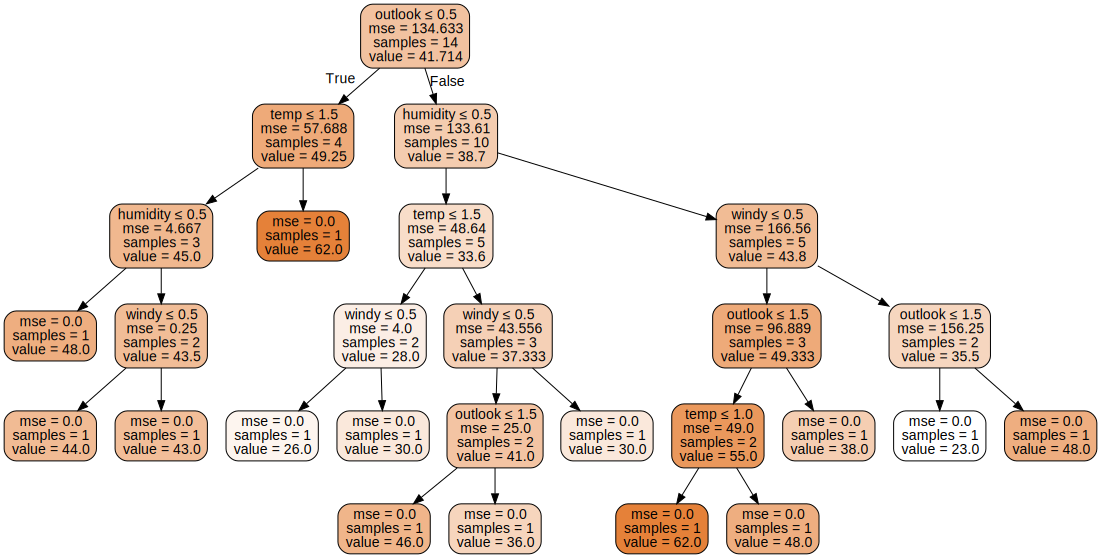

In [20]:
dot_data =export_graphviz(dt, out_file=None, 
                     feature_names=['outlook','temp','humidity','windy'],  
                      class_names=play_time.time,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [63]:
dt.predict([[2,1,1,1]])

array([48.])

In [64]:
dt.feature_importances_

array([0.46325729, 0.22244834, 0.14515689, 0.16913749])